In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import glob
from datetime import datetime


colormap = plt.cm.gnuplot
colormap2 = plt.cm.cividis

In [2]:
matplotlib.style.use('default')
plt.rcParams.update({'xtick.labelsize' : '18'})
plt.rcParams.update({'ytick.labelsize' : '18'})
plt.rcParams.update({'legend.fontsize' : '18'})
plt.rcParams.update({'font.size' : '18'})
plt.rcParams.update({'axes.formatter.useoffset' : False})
plt.rcParams['axes.grid'] = True

### spectrum analyzer csv data file folder:

In [3]:
daq_directory = "/Users/pollak/ownCloud/2022-SPT/Starlink/DSL_Measurement/starlink_data/"

In [4]:
def get_timestamp(timestr):
    hours = int(timestr.split(':')[0])
    minutes = int(timestr.split(':')[1])
    timestamp = hours*60 + minutes
    return timestamp

#### read the data from the csv files into a dictionary sorted by day and time of day

In [7]:
fns = glob.glob(os.path.join(daq_directory, '2023-05*.csv'))
#print(fns)

batches = {}
for day_ind, fn in enumerate(sorted(fns)):
    print(fn)
    batches[day_ind] = {}
    with open(fn, 'r') as f:
        raw = f.readlines()
        f.close()
#     batches[day_ind][0]
    starting_time = raw[2].split(',')[0]
    time_now = starting_time
    freq = []
    dbm = []
    for line in raw[1:]:
        this_time = line.split(',')[0]
        if this_time != time_now:
            timestamp = get_timestamp(this_time)
#             print(timestamp)
            batches[day_ind][timestamp] = {}
            batches[day_ind][timestamp]['freq'] = freq
            batches[day_ind][timestamp]['dbm'] = dbm
            freq = []
            dbm = []
            time_now = this_time
        freq.append(float(line.split(',')[1]))
        dbm.append(float(line.split(',')[2][:-2]))
        
        

day_inds = range(len(fns))
print (day_inds)
print ('Frequency min: '+ str(freq[0])+'GHz')
print ('Frequency Max: '+ str(freq[len(freq)-1])+'GHz')

/Users/pollak/ownCloud/2022-SPT/Starlink/DSL_Measurement/starlink_data/2023-05-01.csv
/Users/pollak/ownCloud/2022-SPT/Starlink/DSL_Measurement/starlink_data/2023-05-02.csv
/Users/pollak/ownCloud/2022-SPT/Starlink/DSL_Measurement/starlink_data/2023-05-03.csv
/Users/pollak/ownCloud/2022-SPT/Starlink/DSL_Measurement/starlink_data/2023-05-04.csv
/Users/pollak/ownCloud/2022-SPT/Starlink/DSL_Measurement/starlink_data/2023-05-05.csv
/Users/pollak/ownCloud/2022-SPT/Starlink/DSL_Measurement/starlink_data/2023-05-06.csv
/Users/pollak/ownCloud/2022-SPT/Starlink/DSL_Measurement/starlink_data/2023-05-07.csv
/Users/pollak/ownCloud/2022-SPT/Starlink/DSL_Measurement/starlink_data/2023-05-08.csv
/Users/pollak/ownCloud/2022-SPT/Starlink/DSL_Measurement/starlink_data/2023-05-09.csv
/Users/pollak/ownCloud/2022-SPT/Starlink/DSL_Measurement/starlink_data/2023-05-10.csv
range(0, 10)
Frequency min: 1.0GHz
Frequency Max: 16.0GHz


### plot all spectra from each day

97
97
97
97
97
96
97
97
90


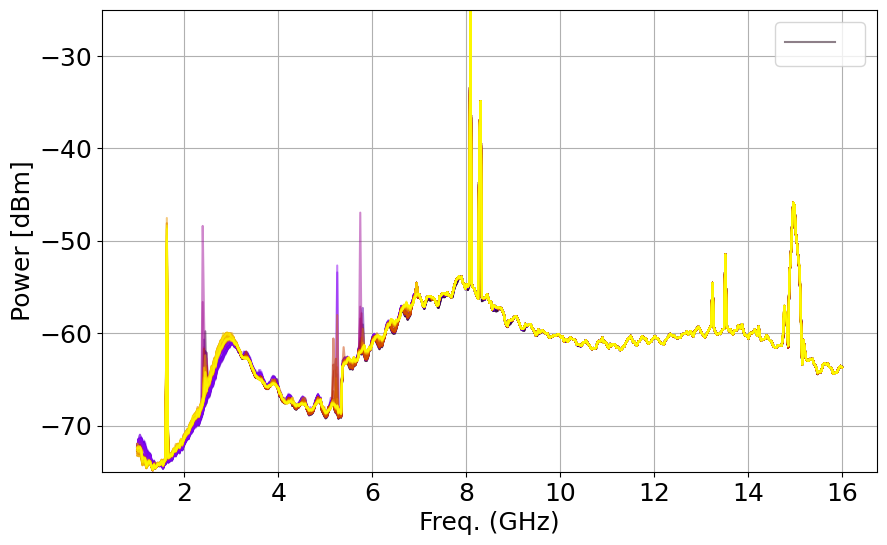

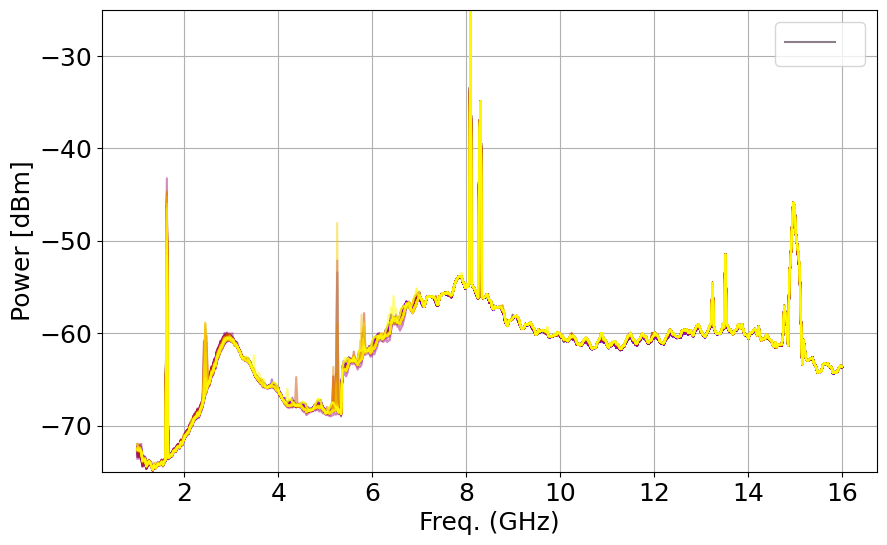

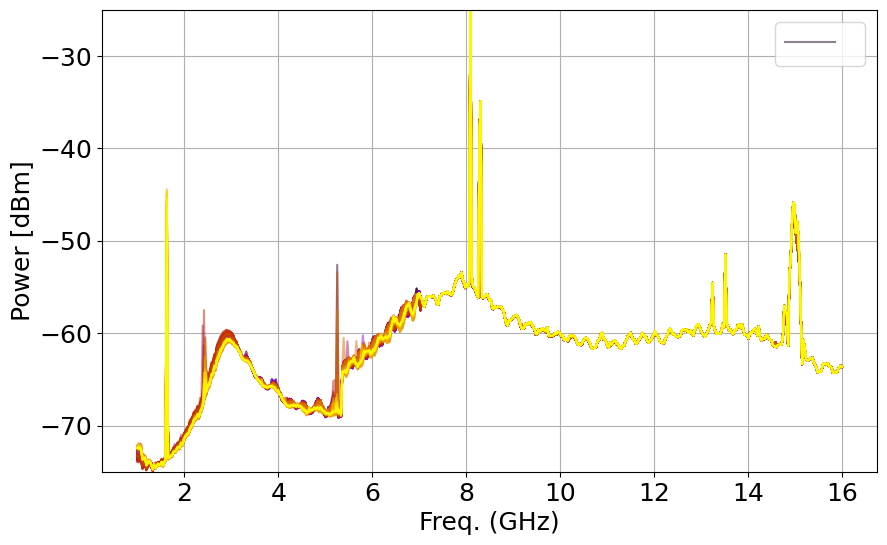

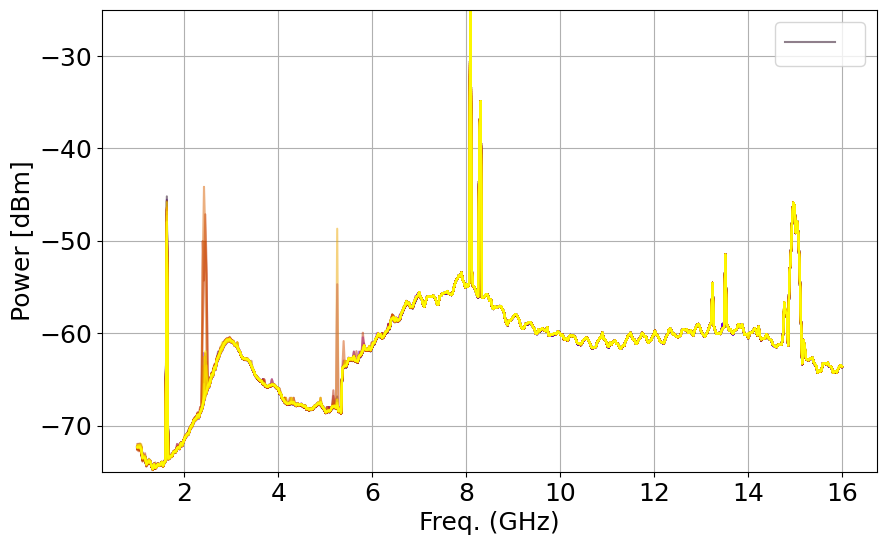

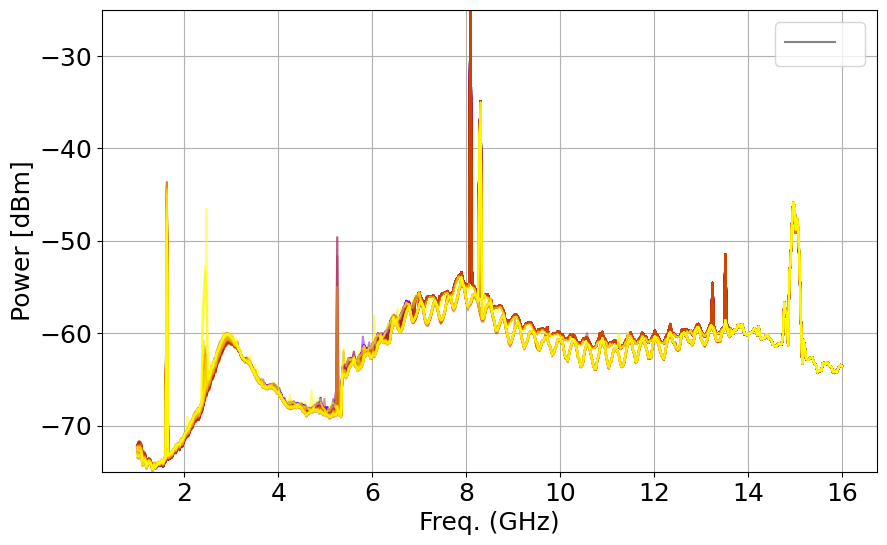

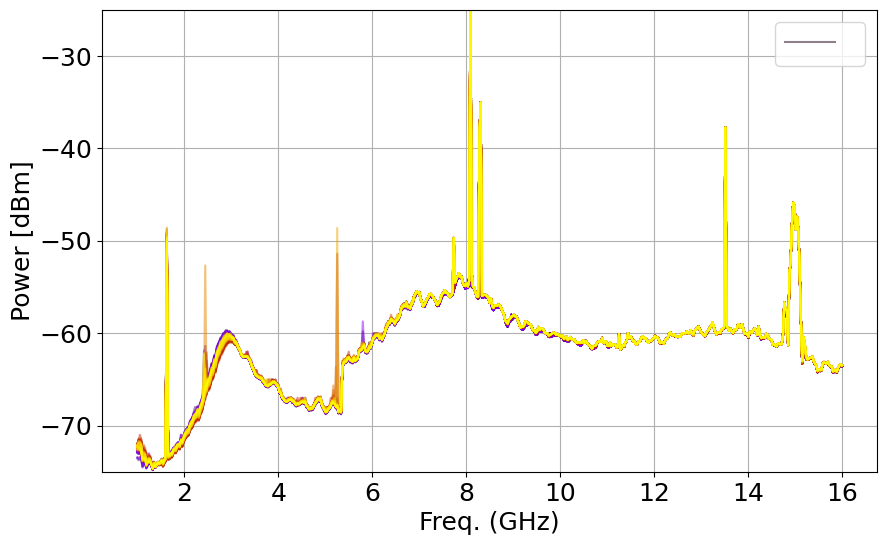

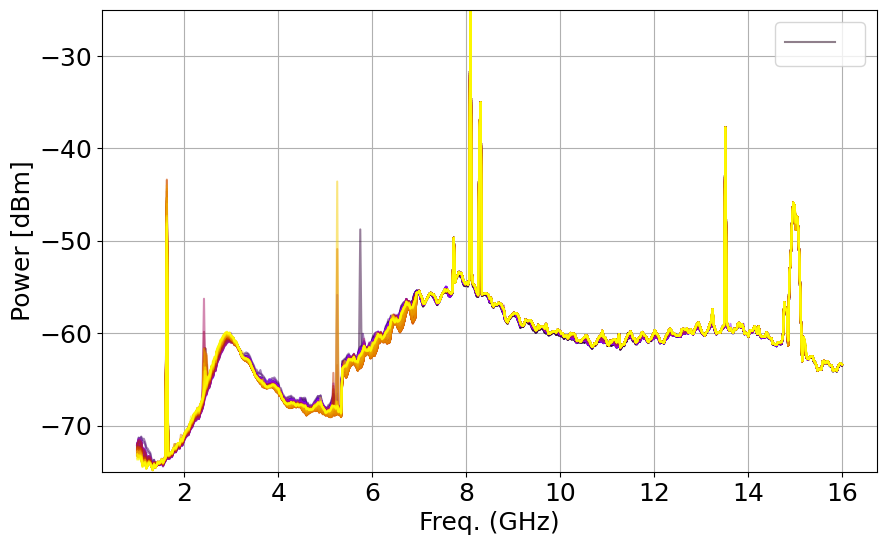

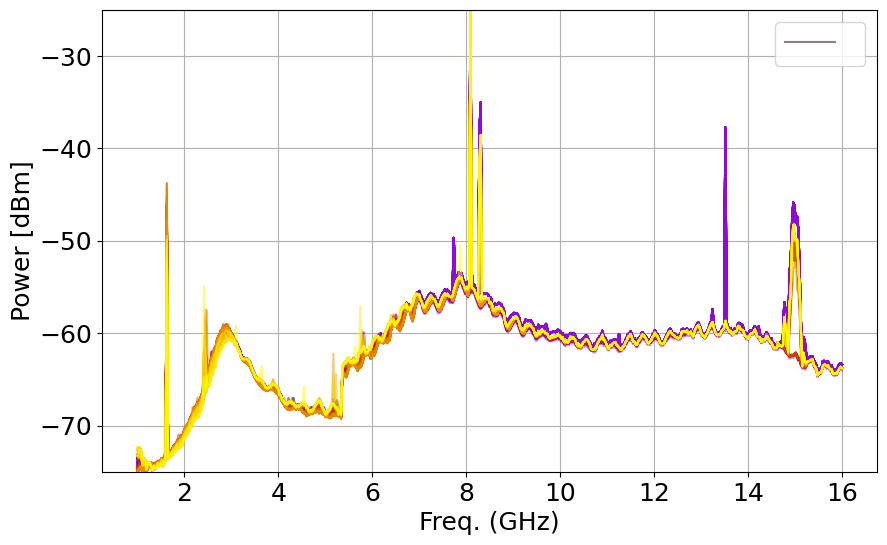

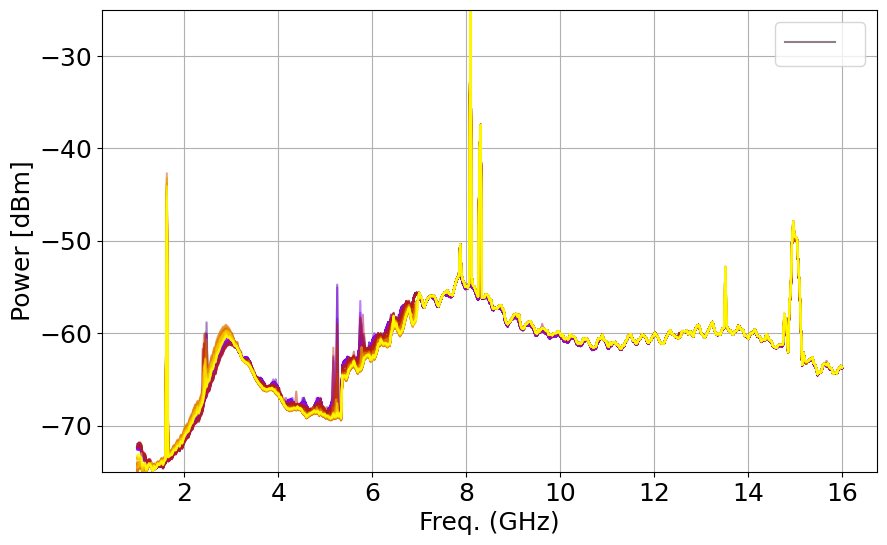

In [8]:
day_inds = [1,2,3,4,5,6,7,8,9]
#day_inds = range(len(fns))


for day_ind in day_inds:
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    timestamps = list(batches[day_ind].keys())
    print(len(timestamps))
    for timestamp in timestamps:
        
        freq = batches[day_ind][timestamp]['freq']
        
        dbm = batches[day_ind][timestamp]['dbm']
        ax.plot(freq, dbm, alpha=0.5, color=colormap(timestamp/max(timestamps)))
    
    ax.set_ylim(-75,-25)    
    ax.set_ylabel('Power [dBm]')
    ax.set_xlabel('Freq. (GHz)')
    ax.legend([""])

#### define some regions that seem to have distinct behaviour

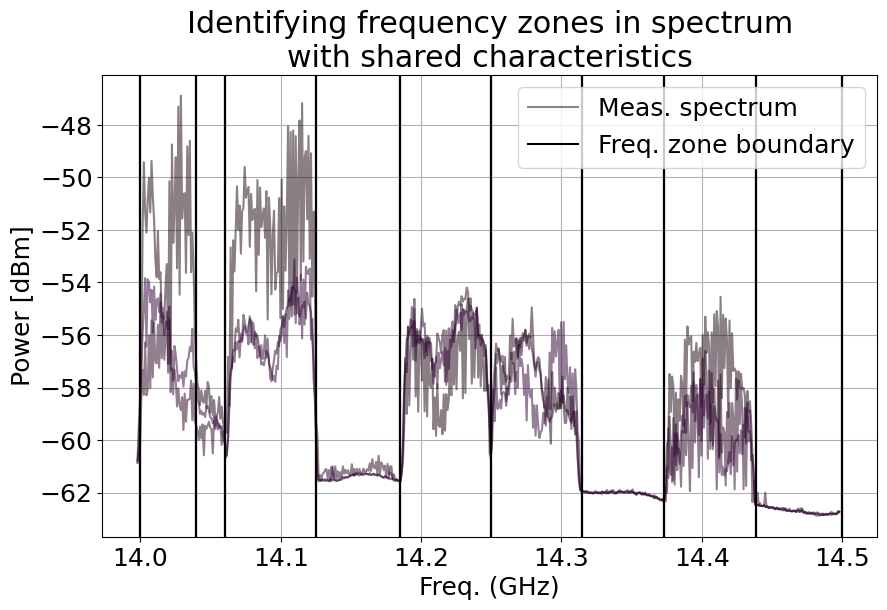

In [73]:
fbinwidth = 3
bin_edges_approx = [14, 14.04, 14.06, 14.125, 14.185, 14.25, 
                    14.315, 14.373, 14.439, 14.5]

for day_ind in day_inds[1:2]:
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    timestamps = list(batches[day_ind].keys())

    for ind, timestamp in enumerate(timestamps[:3]):
        
        freq = batches[day_ind][timestamp]['freq']
        dbm = batches[day_ind][timestamp]['dbm']
        if ind == 2:
            label_data = 'Meas. spectrum'
#             label_lines = 'Freq. zone boundary'
        else:
            label_data = ''
#             label_lines = ''
        ax.plot(freq, dbm, alpha=0.5, 
                color=colormap(timestamp/max(timestamps)), 
                label=label_data)
        for line_ind, edge in enumerate(bin_edges_approx):
            if line_ind == 1 and ind == 2:
                label_lines = 'Freq. zone boundary'
            else:
                label_lines = ''
            ax.axvline(edge, color='black', label=label_lines)

    ax.legend(loc='upper right')
    ax.set_title('Identifying frequency zones in spectrum\nwith shared characteristics')    
    ax.set_ylabel('Power [dBm]')
    ax.set_xlabel('Freq. (GHz)')

#### clump the data in these regions and plot 

[14.019363636363638, 14.049363636363637, 14.09209090909091, 14.154818181818182, 14.217090909090915, 14.28209090909091, 14.343454545454552, 14.405272727272727, 14.468000000000004] [-52.350452045454546, -58.50626727272727, -52.27527333333333, -61.35445151515151, -57.47636366197184, -57.92124583333334, -62.036473015873014, -57.90081780821917, -62.69904261538462]
[14.019363636363638, 14.049363636363637, 14.09209090909091, 14.154818181818182, 14.217090909090915, 14.28209090909091, 14.343454545454552, 14.405272727272727, 14.468000000000004] [-57.54090431818183, -59.63299681818182, -56.174717916666665, -61.19660303030303, -56.28396845070422, -57.924331111111115, -62.03377523809523, -59.87659890410959, -62.68479661538461]
[14.019363636363638, 14.049363636363637, 14.09209090909091, 14.154818181818182, 14.217090909090915, 14.28209090909091, 14.343454545454552, 14.405272727272727, 14.468000000000004] [-56.13754159090909, -59.075450909090904, -56.20944180555556, -61.38302681818181, -56.45323521126

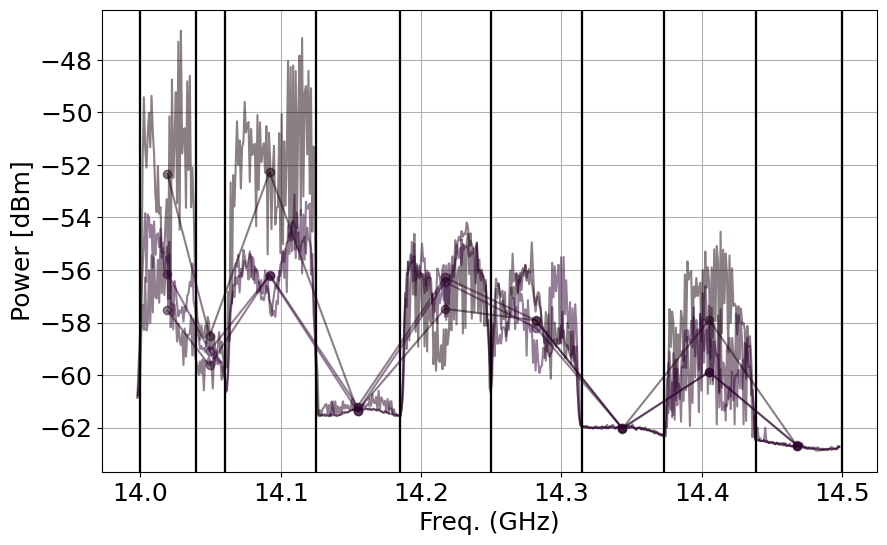

In [74]:
fbinwidth = 3
bin_edges_approx = [14, 14.04, 14.06, 14.125, 14.185, 14.25, 
                    14.315, 14.373, 14.439, 14.5]

for day_ind in day_inds[1:2]:
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    timestamps = list(batches[day_ind].keys())

    for timestamp in timestamps[:3]:
        
        freq = batches[day_ind][timestamp]['freq']
        dbm = batches[day_ind][timestamp]['dbm']
        ax.plot(freq, dbm, alpha=0.5, color=colormap(timestamp/max(timestamps)))
        fbinned = []
        dbmbinned = []
        for edge in bin_edges_approx:
            ax.axvline(edge, color='black')
        for i, edge in enumerate(bin_edges_approx[:-1]):
            nearest_ind = abs(np.asarray(freq) - edge).argmin()
            next_ind = abs(np.asarray(freq) - bin_edges_approx[i+1]).argmin()
            fbinned.append(np.mean(freq[nearest_ind:next_ind]))
            dbmbinned.append(np.mean(dbm[nearest_ind:next_ind]))
        print(fbinned, dbmbinned)
        
        
        ax.plot(fbinned, dbmbinned, 'o-', alpha=0.5, color=colormap(timestamp/max(timestamps)))
        
    ax.set_ylabel('Power [dBm]')
    ax.set_xlabel('Freq. (GHz)')

In [75]:
fbinned = [14.019363636363638, 14.049363636363637, 14.09209090909091, 14.154818181818182, 14.217090909090915, 14.28209090909091, 14.343454545454552, 14.405272727272727, 14.468000000000004]


##### stack the days for (possibly) easier reading

In [76]:
for ind, fn in enumerate(sorted(fns)):
    print(ind, fn)

0 /Users/pollak/ownCloud/2022-SPT/Starlink/DSL_Measurement/starlink_data/2022-12-14.csv
1 /Users/pollak/ownCloud/2022-SPT/Starlink/DSL_Measurement/starlink_data/2022-12-15.csv
2 /Users/pollak/ownCloud/2022-SPT/Starlink/DSL_Measurement/starlink_data/2022-12-16.csv
3 /Users/pollak/ownCloud/2022-SPT/Starlink/DSL_Measurement/starlink_data/2022-12-17.csv
4 /Users/pollak/ownCloud/2022-SPT/Starlink/DSL_Measurement/starlink_data/2022-12-18.csv
5 /Users/pollak/ownCloud/2022-SPT/Starlink/DSL_Measurement/starlink_data/2022-12-19.csv
6 /Users/pollak/ownCloud/2022-SPT/Starlink/DSL_Measurement/starlink_data/2022-12-20.csv
7 /Users/pollak/ownCloud/2022-SPT/Starlink/DSL_Measurement/starlink_data/2022-12-21.csv
8 /Users/pollak/ownCloud/2022-SPT/Starlink/DSL_Measurement/starlink_data/2022-12-22.csv
9 /Users/pollak/ownCloud/2022-SPT/Starlink/DSL_Measurement/starlink_data/2022-12-23.csv
10 /Users/pollak/ownCloud/2022-SPT/Starlink/DSL_Measurement/starlink_data/2022-12-24.csv
11 /Users/pollak/ownCloud/2022-

2022-12-21
2022-12-15
2022-12-17
2022-12-27
2023-01-21


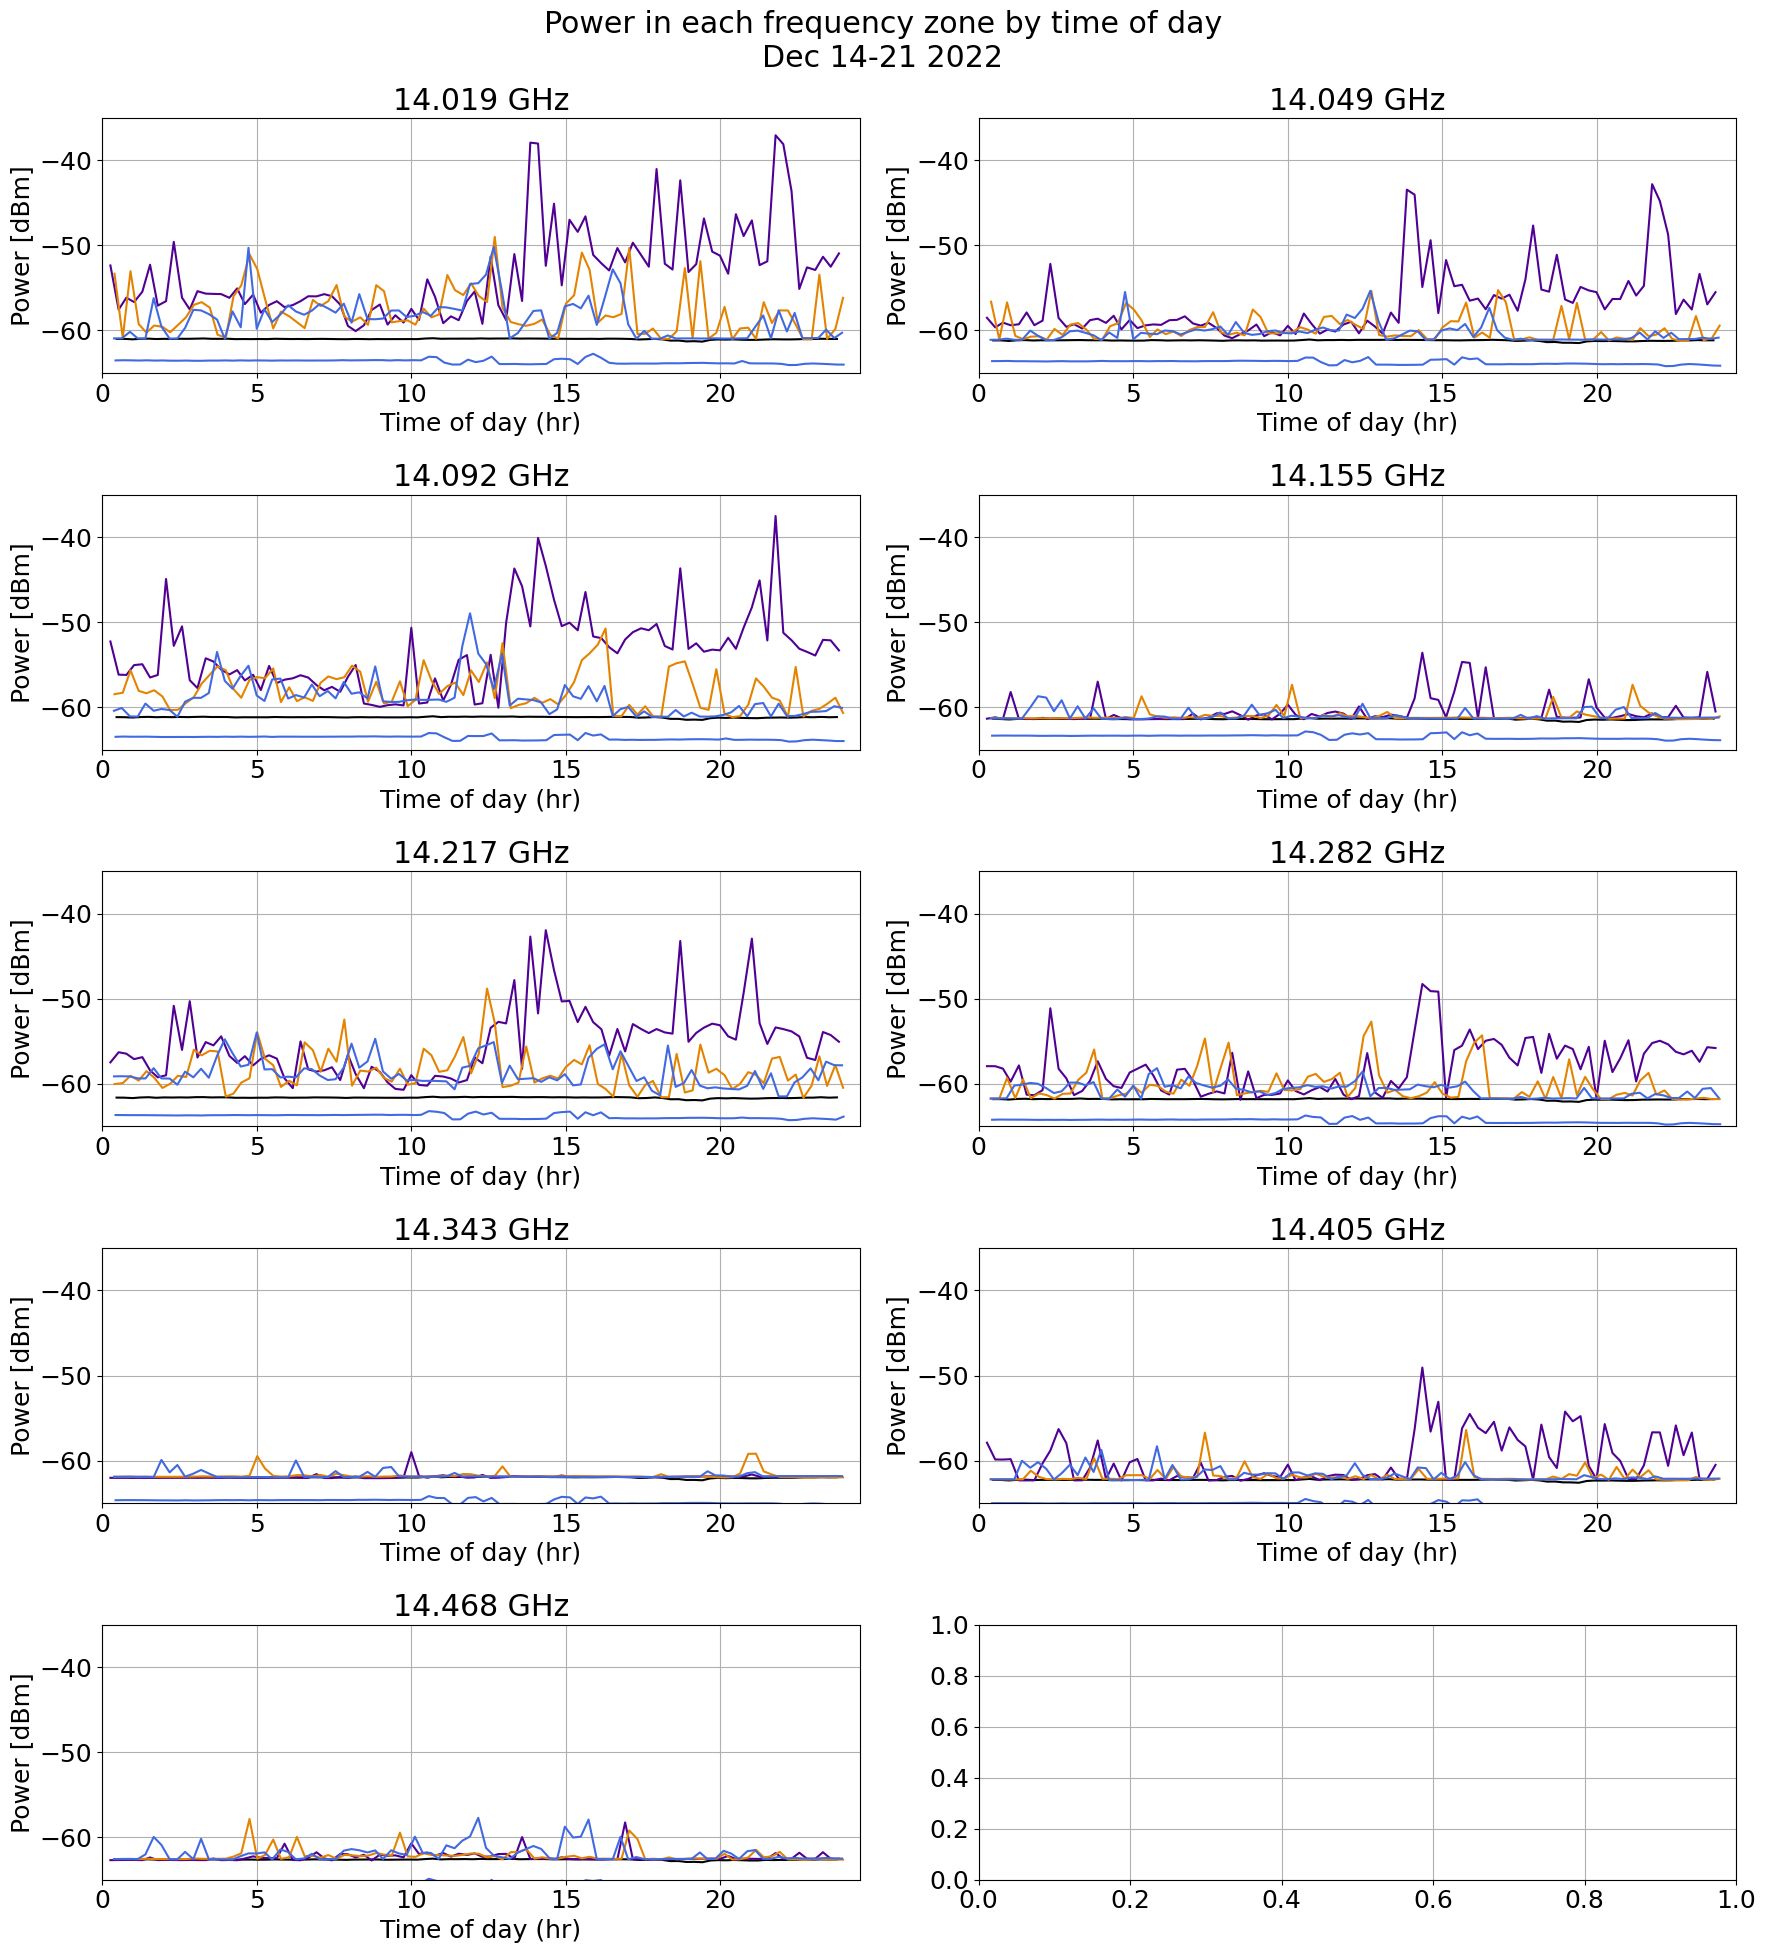

In [77]:


bin_edges_approx = [14, 14.04, 14.06, 14.125, 14.185, 14.25, 
                    14.315, 14.373, 14.439, 14.5]

fig, axs = plt.subplots(5, 2, figsize=(3*6, 4*5))

for day_ind in day_inds:
#     plotcolour = (day_ind) / (max(day_inds) + 0.3)
    if day_ind < 2:
        plotcolour = colormap(0.1)
    elif day_ind < 6:
        plotcolour = colormap(0.8)
    elif day_ind < 12:
        plotcolour = colormap(0)
    else:
        plotcolour = 'royalblue'
    today = sorted(fns)[day_ind].split('/')[-1].split('.')[0]
    print(today)
    bin_dict = {}
    for fbin in fbinned:
        bin_dict[fbin] = {}
        bin_dict[fbin]['timestamp'] = []
        bin_dict[fbin]['dbm'] = []
    
    
    timestamps = sorted(batches[day_ind].keys())

    for timestamp in timestamps:
        
        freq = batches[day_ind][timestamp]['freq']
        dbm = batches[day_ind][timestamp]['dbm']

        dbmbinned = []
        for i, edge in enumerate(bin_edges_approx[:-1]):
            nearest_ind = abs(np.asarray(freq) - edge).argmin()
            next_ind = abs(np.asarray(freq) - bin_edges_approx[i+1]).argmin()
#             fbinned.append(np.mean(freq[nearest_ind:next_ind]))
            dbmbinned.append(np.mean(dbm[nearest_ind:next_ind]))
        for i, fbin in enumerate(fbinned):
            bin_dict[fbin]['timestamp'].append(timestamp)
            bin_dict[fbin]['dbm'].append(dbmbinned[i])
            
    for i, fbin in enumerate(fbinned):
        timestamps = np.asarray(bin_dict[fbin]['timestamp'])
        dbm = bin_dict[fbin]['dbm']
        ax = axs[i//2, i%2]
        
        
        if day_ind == 2:

            ax.plot(timestamps[:int(len(timestamps)/2)+1]/60, dbm[:int(len(timestamps)/2)+1], 
                    color=plotcolour, label='pre-baffle')
            ax.plot(timestamps[int(len(timestamps)/2):]/60, dbm[int(len(timestamps)/2):],
                    color=plotcolour, label='baffle installed')
            ax.legend(loc='upper left', fontsize=13)
        elif day_ind == 6:

            ax.plot(timestamps[:int(len(timestamps)/2)+1]/60, dbm[:int(len(timestamps)/2)+1], 
                    color=plotcolour)
            ax.plot(timestamps[int(len(timestamps)/2):]/60, dbm[int(len(timestamps)/2):],
                    color=plotcolour, label='Starlink off')
            ax.legend(loc='upper left', fontsize=13)
        else:
            ax.plot(timestamps/60, dbm, color=plotcolour)
        ax.set_ylim(-65, -35)
        ax.set_xlim(0, 24.5)
        ax.set_title('%.3f GHz'%fbin)
        ax.set_ylabel('Power [dBm]')
        ax.set_xlabel('Time of day (hr)')
        
    fig.suptitle('Power in each frequency zone by time of day\nDec 14-21 2022')
    fig.tight_layout()

#### convert the binned data into dbm/hz over the bandwidth of each bin

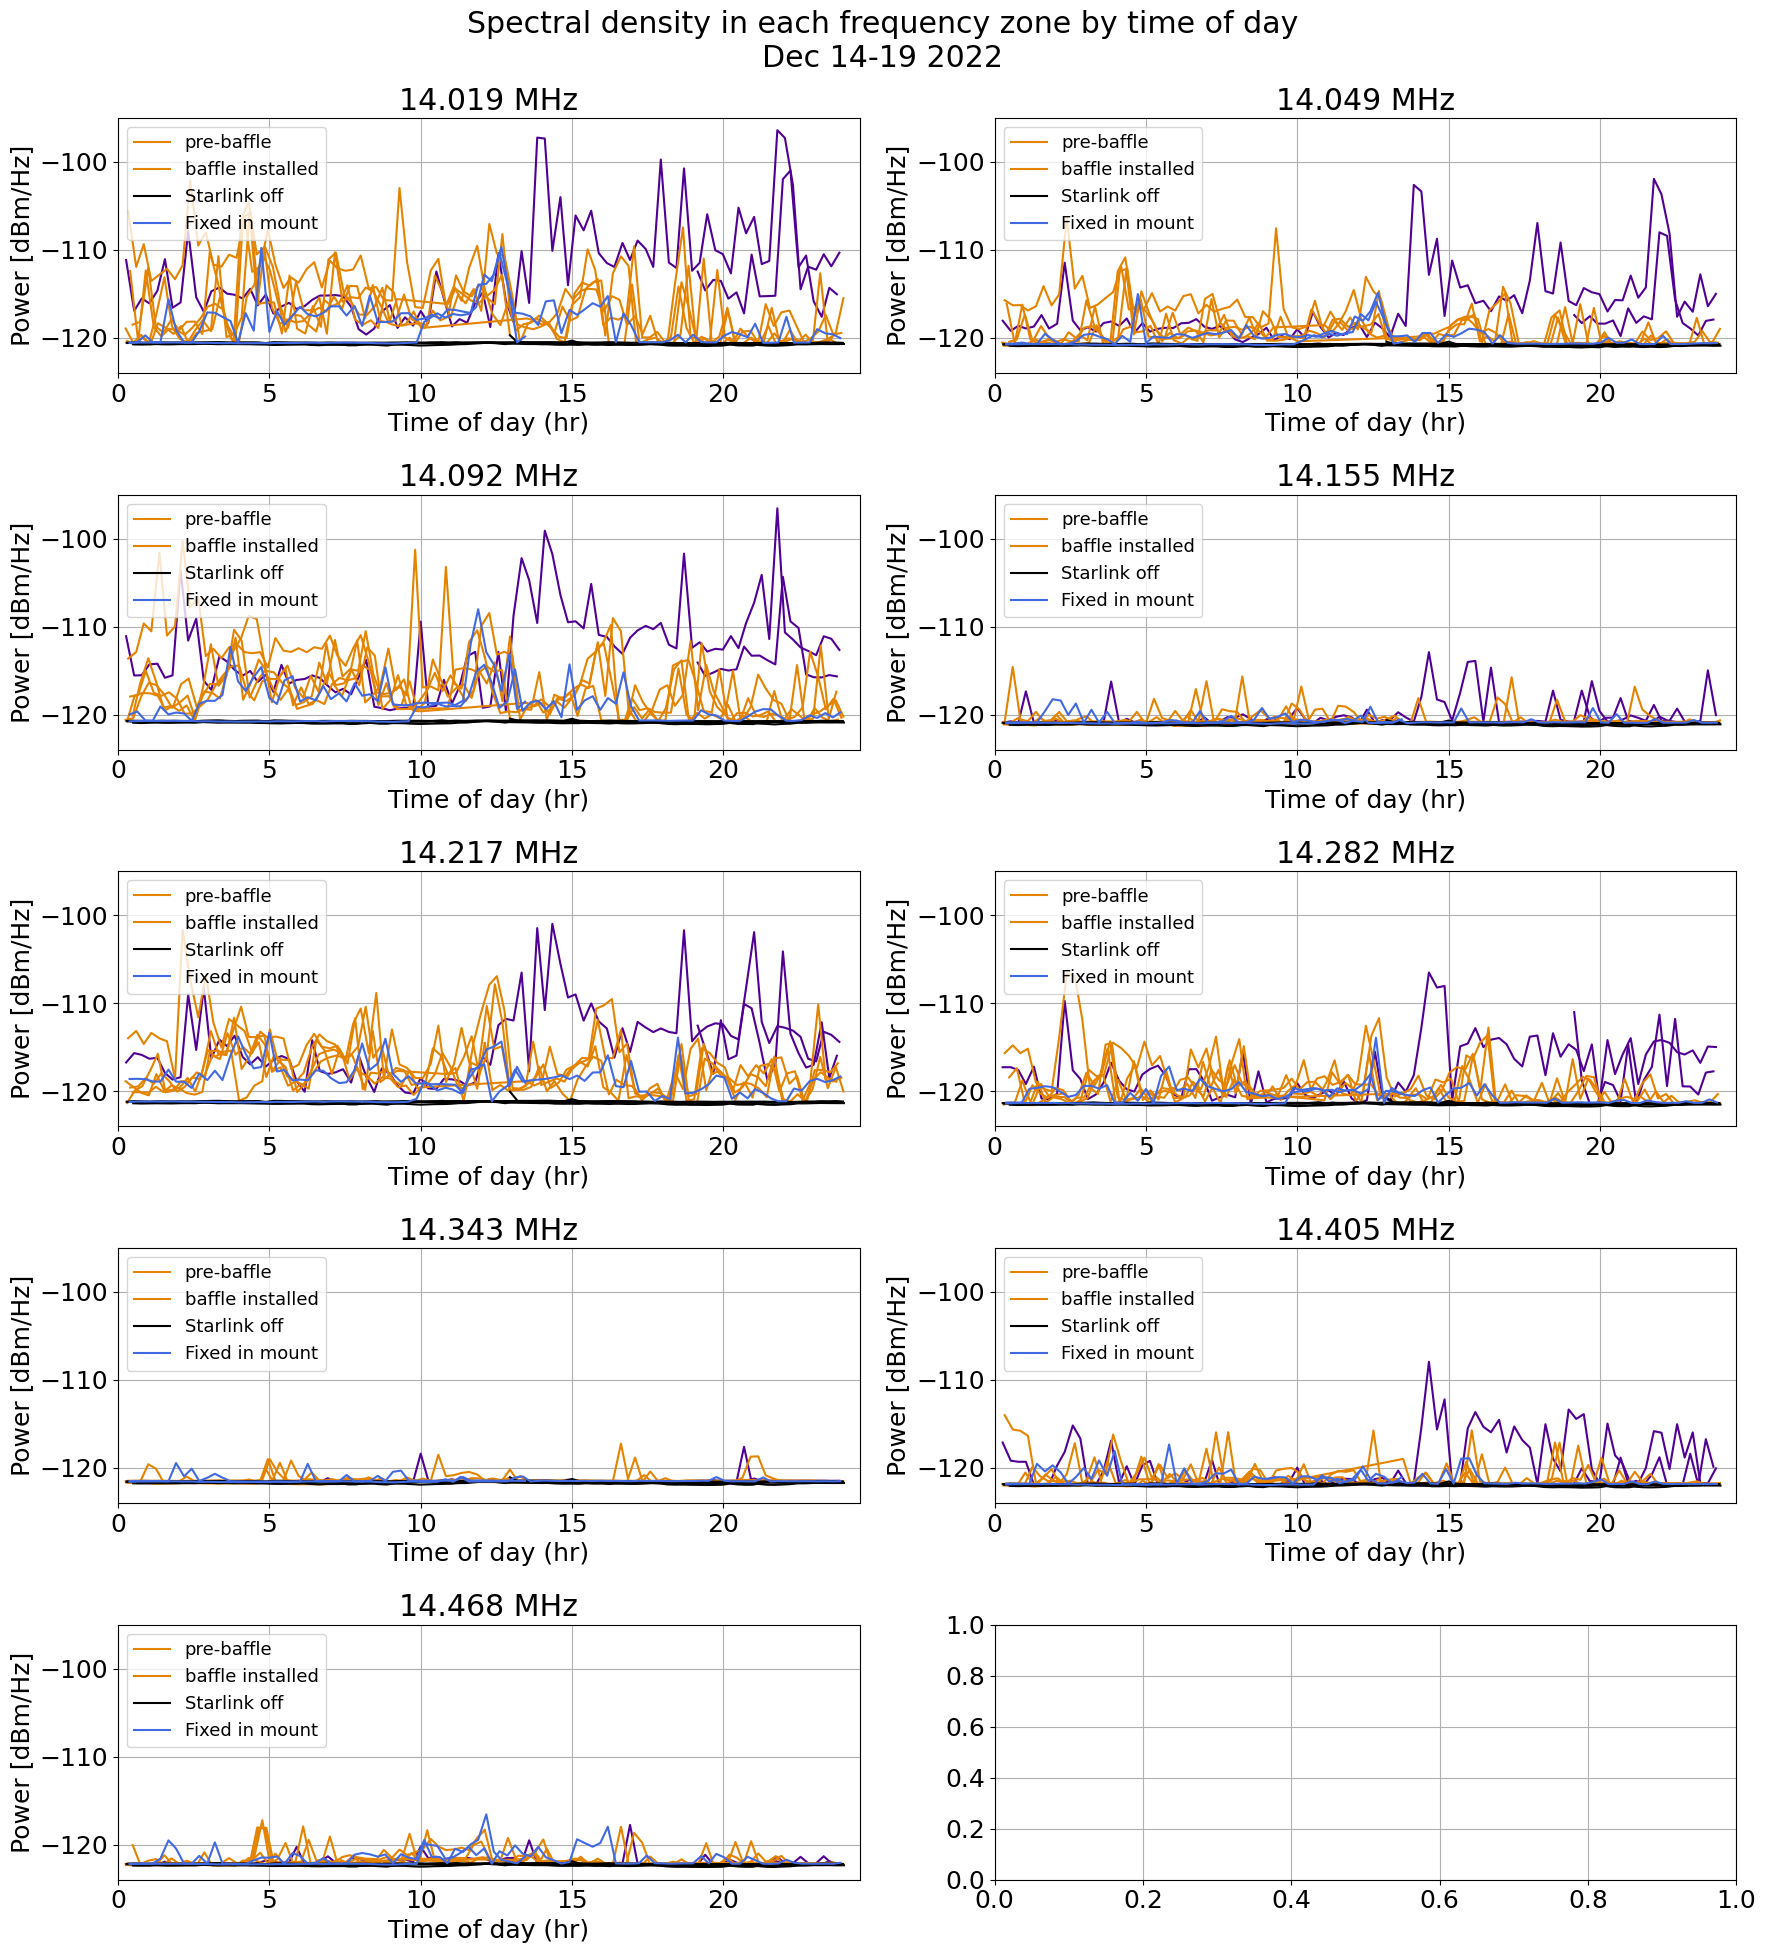

In [111]:


bin_edges_approx = [14, 14.04, 14.06, 14.125, 14.185, 14.25, 
                    14.315, 14.373, 14.439, 14.5]

fig, axs = plt.subplots(5, 2, figsize=(3*6, 4*5))

for day_ind in day_inds:
    if day_ind < 2:
        plotcolour = colormap(0.1)
    elif day_ind < 6:
        plotcolour = colormap(0.8)
    elif day_ind < 12:
        plotcolour = colormap(0)
    else:
        plotcolour = 'royalblue'
    today = sorted(fns)[day_ind].split('/')[-1].split('.')[0]
    bin_dict = {}
    for fbin in fbinned:
        bin_dict[fbin] = {}
        bin_dict[fbin]['timestamp'] = []
        bin_dict[fbin]['dbm'] = []
    
    timestamps = sorted(batches[day_ind].keys())

    for timestamp in timestamps:
        
        freq = batches[day_ind][timestamp]['freq']
        rbw = 3e6
        dbm = batches[day_ind][timestamp]['dbm']

        dbmbinned = []
        for i, edge in enumerate(bin_edges_approx[:-1]):
            nearest_ind = abs(np.asarray(freq) - edge).argmin()
            next_ind = abs(np.asarray(freq) - bin_edges_approx[i+1]).argmin()
            bin_width = (freq[next_ind] - freq[nearest_ind])*1e9

            watts = [(10**(x/10.) * 1e-3) for x in dbm[nearest_ind:next_ind]]
            watts_per_hz = [w/rbw for w in watts]
            dbm_per_hz = [10*np.log10(x*1e3) for x in watts_per_hz]
            total_watts_in_bin = sum(watts)
            dbm_per_hz_whole_bin = 10*np.log10(1e3*total_watts_in_bin / bin_width)
            dbmbinned.append(dbm_per_hz_whole_bin)
        for i, fbin in enumerate(fbinned):
            bin_dict[fbin]['timestamp'].append(timestamp)
            bin_dict[fbin]['dbm'].append(dbmbinned[i])
            
    for i, fbin in enumerate(fbinned):
        timestamps = np.asarray(bin_dict[fbin]['timestamp'])
        dbm = bin_dict[fbin]['dbm']
        ax = axs[i//2, i%2]
        if day_ind == 2:
            ax.plot(timestamps[:int(len(timestamps)/2)+1]/60, dbm[:int(len(timestamps)/2)+1], 
                    color=plotcolour, label='pre-baffle')
            ax.plot(timestamps[int(len(timestamps)/2):]/60, dbm[int(len(timestamps)/2):],
                    color=plotcolour, label='baffle installed')
            ax.legend(loc='upper left', fontsize=13)
            
        elif day_ind == 6:

            ax.plot(timestamps[:int(len(timestamps)/2)+1]/60, dbm[:int(len(timestamps)/2)+1], 
                    color=colormap(0.8))
            ax.plot(timestamps[int(len(timestamps)/2):]/60, dbm[int(len(timestamps)/2):],
                    color=plotcolour, label='Starlink off')
            ax.legend(loc='upper left', fontsize=13)
        elif day_ind == 12:
            ax.plot(timestamps[:int(len(timestamps)/3)+1]/60, dbm[:int(len(timestamps)/3)+1], 
                    color=plotcolour)
            ax.plot(timestamps[int(len(timestamps)/3):]/60, dbm[int(len(timestamps)/3):],
                    color='royalblue', label='Fixed in mount')
            ax.legend(loc='upper left', fontsize=13)
        else:

            ax.plot(timestamps/60, dbm, color=plotcolour)

        ax.set_ylim(-124, -95)
        ax.set_xlim(0, 24.5)
        ax.set_title('%.3f MHz'%fbin)
        ax.set_ylabel('Power [dBm/Hz]')
        ax.set_xlabel('Time of day (hr)')
#         ax.legend(loc='upper left', fontsize=13)
#     fig.delaxes(axs[(i+1)//2, (i+1)%2])
    fig.suptitle('Spectral density in each frequency zone by time of day\nDec 14-19 2022')
    fig.tight_layout()

### sum the power over the whole 500 MHz bandwidth and plot as function of time

Baffle installed 2022-12-16
Starlink turned off 2022-12-20
Turned back on and pointing away 2022-12-26


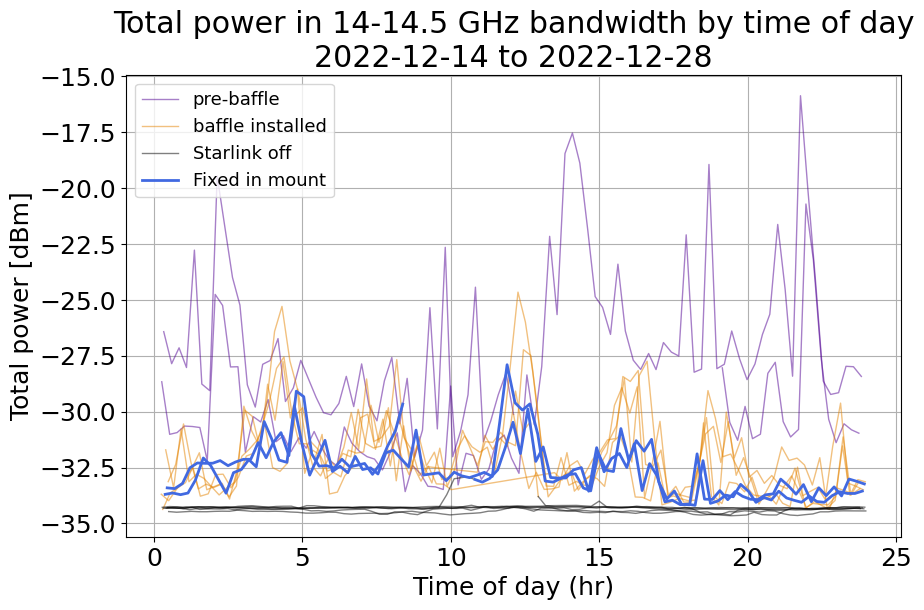

In [129]:
# day_inds = [0, 1, 2, 3]
day_inds = range(len(fns))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

alpha_old = 0.5
alpha_new = 1

lw_old = 1
lw_new = 2

for day_ind in day_inds:
    today = sorted(fns)[day_ind].split('/')[-1].split('.')[0]
    if day_ind < 2:
        plotcolour = colormap(0.1)
        alpha=alpha_old
        lw = lw_old
    elif day_ind < 6:
        plotcolour = colormap(0.8)
        alpha=alpha_old
        lw = lw_old
    elif day_ind < 12:
        plotcolour = colormap(0)
        alpha = alpha_old
        lw = lw_old
    else:
        plotcolour = 'royalblue'
        alpha=alpha_new
        lw = lw_new

    timestamps = np.asarray(list(batches[day_ind].keys()))
    totals = []
    for timestamp in timestamps:
        
        freq = batches[day_ind][timestamp]['freq']
        
        dbm = np.asarray(batches[day_ind][timestamp]['dbm'])
        sum_watts = sum(10**(dbm/10) * 1e-3)
        totals.append(10*np.log10(sum_watts*1e3))
        
        
    if day_ind == 2:
        print('Baffle installed', today)
        ax.plot(timestamps[:int(len(timestamps)/2)+1]/60, totals[:int(len(timestamps)/2)+1], 
                color=colormap(0.1), alpha=alpha, lw=lw, label='pre-baffle')
        ax.plot(timestamps[int(len(timestamps)/2):]/60, totals[int(len(timestamps)/2):],
                color=plotcolour, alpha=alpha, lw=lw, label='baffle installed')
        ax.legend(loc='upper left', fontsize=13)

    elif day_ind == 6:
        print('Starlink turned off', today)
        ax.plot(timestamps[:int(len(timestamps)/2)+1]/60, totals[:int(len(timestamps)/2)+1], 
                color=colormap(0.8), alpha=alpha, lw=lw)
        ax.plot(timestamps[int(len(timestamps)/2):]/60, totals[int(len(timestamps)/2):],
                color=plotcolour, alpha=alpha, lw=lw, label='Starlink off')
        ax.legend(loc='upper left', fontsize=13)
    elif day_ind == 12:
        print('Turned back on and pointing away', today)
        changetime = 2.3
        ax.plot(timestamps[:int(len(timestamps)/changetime)+1]/60, totals[:int(len(timestamps)/changetime)+1], 
                color=colormap(0.), alpha=alpha_old, lw=lw_old)
        ax.plot(timestamps[int(len(timestamps)/changetime):]/60, totals[int(len(timestamps)/changetime):],
                color='royalblue', alpha=alpha_new, lw=lw_new, label='Fixed in mount')
        ax.legend(loc='upper left', fontsize=13)
    else:

        ax.plot(timestamps/60, totals, alpha=alpha, lw=lw, color=plotcolour)
#     ax.plot(timestamps, totals, )
        
    ax.set_ylabel('Total power [dBm]')
    ax.set_xlabel('Time of day (hr)')
    first_day = sorted(fns)[0].split('/')[-1].split('.')[0]
    last_day = sorted(fns)[-1].split('/')[-1].split('.')[0]
    ax.set_title('Total power in 14-14.5 GHz bandwidth by time of day\n%s to %s'%(first_day, last_day))
    
    